## 此資料為：[文化部所收錄台灣特色書店的資料](https://data.gov.tw/dataset/6224)
* 資料來源：[政府資料開放平台](https://data.gov.tw/)
* 利用資料探勘整理資料

In [37]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [38]:
#讀取資料
orgdata = pd.read_csv('FeaturedBookstore.csv')

In [39]:
orgdata.head()

,name,representImage,intro,address,longitude,latitude,openTime,phone,email,headCityName,cityName,groupTypeName
0,人生書局,http://cloud.culture.tw/e_new_upload/cms/image...,位在鹽埕區的新樂街上，看守著台灣戰後的歷史。早年人生書局只賣自己出版的書籍，是個相當「冷門」...,新樂街145號,120.281814,22.620168,一～日｜09:00 - 21:00,NaN,NaN,NaN,高雄市 鹽埕區,實體書店
1,一本書店,http://cloud.culture.tw/e_new_upload/cms/image...,位於台中文創園區對面的一本書店，與許多手作文創產業合作，在店內會舉辦教學課程。時常舉辦新詩朗...,復興路3段348巷2-2號1樓,120.679643,24.132733,三～日｜12:00 - 17:00,NaN,NaN,NaN,臺中市 南區,實體書店
2,書集喜室,http://cloud.culture.tw/e_new_upload/cms/image...,隱身在鹿港巷弄中的書集喜室，是一間二手書店，原本一棟快要廢棄的日治時期老屋，被店主買下，經過...,彰化縣鹿港鎮杉行街20號,120.435059,24.057213,週三至週日11:00-17:30,NaN,NaN,NaN,彰化縣 鹿港鎮,實體書店
3,樸食小舖,http://cloud.culture.tw/e_new_upload/cms/image...,樸食小舖，我們是「市集裡的書店」!\r\n\r\n我們原先在新竹市開有機複合餐廳，後來移居苗...,新竹市光復路二段101號(清大成功湖邊),120.969102,24.806942,每月第一周和第三周的周六，早上九點到下午兩點,NaN,nicole571105@gmail.com,竹蜻蜓綠市集,新竹市 新竹市,實體書店
4,小陽。日栽書屋,http://cloud.culture.tw/e_new_upload/cms/image...,一點勇氣將小陽。春日子更明確蛻變成小陽。日栽書屋，走過那段和伙伴一起的充滿春分生命力的日子，...,屏東市中山路清營巷1號,120.501205,22.677970,週四至週日 14:00-20:00,NaN,ssunville@hotmail.com,NaN,屏東縣 屏東市,實體書店


In [40]:
documents = ['我是臺灣師範大學科技系114級徐嫚謙']#一段字串
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)#用jieba做cut斷詞
    print('/'.join(seg_list))#印出來的內容用斜線隔開

我/是/臺灣師範大學/科技系/114級/徐嫚謙


In [41]:
jieba.load_userdict('./userdict.txt')#自己建立斷詞文本

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺灣師範大學/科技系/114級/徐嫚謙


In [42]:
#新增一個新欄位
orgdata['seg'] = ""
orgdata.head()

,name,representImage,intro,address,longitude,latitude,openTime,phone,email,headCityName,cityName,groupTypeName,seg
0,人生書局,http://cloud.culture.tw/e_new_upload/cms/image...,位在鹽埕區的新樂街上，看守著台灣戰後的歷史。早年人生書局只賣自己出版的書籍，是個相當「冷門」...,新樂街145號,120.281814,22.620168,一～日｜09:00 - 21:00,NaN,NaN,NaN,高雄市 鹽埕區,實體書店,
1,一本書店,http://cloud.culture.tw/e_new_upload/cms/image...,位於台中文創園區對面的一本書店，與許多手作文創產業合作，在店內會舉辦教學課程。時常舉辦新詩朗...,復興路3段348巷2-2號1樓,120.679643,24.132733,三～日｜12:00 - 17:00,NaN,NaN,NaN,臺中市 南區,實體書店,
2,書集喜室,http://cloud.culture.tw/e_new_upload/cms/image...,隱身在鹿港巷弄中的書集喜室，是一間二手書店，原本一棟快要廢棄的日治時期老屋，被店主買下，經過...,彰化縣鹿港鎮杉行街20號,120.435059,24.057213,週三至週日11:00-17:30,NaN,NaN,NaN,彰化縣 鹿港鎮,實體書店,
3,樸食小舖,http://cloud.culture.tw/e_new_upload/cms/image...,樸食小舖，我們是「市集裡的書店」!\r\n\r\n我們原先在新竹市開有機複合餐廳，後來移居苗...,新竹市光復路二段101號(清大成功湖邊),120.969102,24.806942,每月第一周和第三周的周六，早上九點到下午兩點,NaN,nicole571105@gmail.com,竹蜻蜓綠市集,新竹市 新竹市,實體書店,
4,小陽。日栽書屋,http://cloud.culture.tw/e_new_upload/cms/image...,一點勇氣將小陽。春日子更明確蛻變成小陽。日栽書屋，走過那段和伙伴一起的充滿春分生命力的日子，...,屏東市中山路清營巷1號,120.501205,22.677970,週四至週日 14:00-20:00,NaN,ssunville@hotmail.com,NaN,屏東縣 屏東市,實體書店,


In [43]:
jieba.analyse.set_stop_words('stopwords.txt') #自己建一個贅字檔
index = 0
for documents in orgdata['intro']: #將檔案的intro欄位利用迴圈存入documents
    seg_list = jieba.analyse.extract_tags(documents, 150) #150是前150個權重最高的單詞
    #seg_list = jieba.lcut(documents) #不刪除贅字
    orgdata['seg'].iloc[index] = seg_list #存入seg_list
    index += 1


C:\Users\USER\AppData\Local\Temp\ipykernel_47900\2746732732.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
orgdata['seg']

0      [鹽埕區, 新樂街, 台灣, 戰後, 歷史, 人生書局, 只賣, 書籍, 相當, 冷門, 書...
1      [書籍, 創園區, 對面, 書店, 許多手, 創產業, 內會, 舉辦, 教學課程, 時常舉,...
2      [喜室, 書集, 茶屋, 隱身, 巷弄, 一間, 二手書, 一棟, 廢棄, 日治, 時期, ...
3      [書店, 樸食小舖, 市集裡, 沒有, 大門, 市集, 有機複合餐廳, 公館, 鄉間, 展開...
4      [小陽, 一點, 勇氣將, 更明確, 蛻變, 日栽書屋, 走過, 充滿, 延續, 發光, 發...
                             ...                        
104    [池上, 借冊所, 旅人, 交流, 體驗世界, 背包客, 熱愛臺灣, 暫居, 開設, 書店,...
105    [走走池上, 旅人, 半開放式, 空間, 歡迎, 翻閱, 書籍, 放慢腳步, 品嚐, 飲品,...
106    [金門, 二手書, 首間, 經營, 書籍, 買賣, 點心, 長期, 徵求, 換宿, 圖片, ...
107    [撥橘, 咖啡, 本東, 創作, 裝訂, 內頁, Huei, 三明治, 小店, 封面, 小小...
108    [門市, 聯經, 圖書, 陳列, 銷售, 出版, 企管, 1986, 設有, 專業, 出版品...
Name: seg, Length: 109, dtype: object

In [45]:
date_split = orgdata['cityName'].iloc[0].split(' ') #建立一個新的欄位放入用空格格開的cityName

In [46]:
date_split[0] #取出用空格隔開後的第一個文字是縣市

'高雄市'

In [47]:
#新增一個city欄位利用迴圈存入縣市
orgdata['city'] = ""  
index = 0
for documents in orgdata['cityName']: 
    date_split = documents.split(' ')
    orgdata['city'].iloc[index] = date_split[0]
    index += 1

C:\Users\USER\AppData\Local\Temp\ipykernel_47900\1863161369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
orgdata.head()

,name,representImage,intro,address,longitude,latitude,openTime,phone,email,headCityName,cityName,groupTypeName,seg,city
0,人生書局,http://cloud.culture.tw/e_new_upload/cms/image...,位在鹽埕區的新樂街上，看守著台灣戰後的歷史。早年人生書局只賣自己出版的書籍，是個相當「冷門」...,新樂街145號,120.281814,22.620168,一～日｜09:00 - 21:00,NaN,NaN,NaN,高雄市 鹽埕區,實體書店,"[鹽埕區, 新樂街, 台灣, 戰後, 歷史, 人生書局, 只賣, 書籍, 相當, 冷門, 書...",高雄市
1,一本書店,http://cloud.culture.tw/e_new_upload/cms/image...,位於台中文創園區對面的一本書店，與許多手作文創產業合作，在店內會舉辦教學課程。時常舉辦新詩朗...,復興路3段348巷2-2號1樓,120.679643,24.132733,三～日｜12:00 - 17:00,NaN,NaN,NaN,臺中市 南區,實體書店,"[書籍, 創園區, 對面, 書店, 許多手, 創產業, 內會, 舉辦, 教學課程, 時常舉,...",臺中市
2,書集喜室,http://cloud.culture.tw/e_new_upload/cms/image...,隱身在鹿港巷弄中的書集喜室，是一間二手書店，原本一棟快要廢棄的日治時期老屋，被店主買下，經過...,彰化縣鹿港鎮杉行街20號,120.435059,24.057213,週三至週日11:00-17:30,NaN,NaN,NaN,彰化縣 鹿港鎮,實體書店,"[喜室, 書集, 茶屋, 隱身, 巷弄, 一間, 二手書, 一棟, 廢棄, 日治, 時期, ...",彰化縣
3,樸食小舖,http://cloud.culture.tw/e_new_upload/cms/image...,樸食小舖，我們是「市集裡的書店」!\r\n\r\n我們原先在新竹市開有機複合餐廳，後來移居苗...,新竹市光復路二段101號(清大成功湖邊),120.969102,24.806942,每月第一周和第三周的周六，早上九點到下午兩點,NaN,nicole571105@gmail.com,竹蜻蜓綠市集,新竹市 新竹市,實體書店,"[書店, 樸食小舖, 市集裡, 沒有, 大門, 市集, 有機複合餐廳, 公館, 鄉間, 展開...",新竹市
4,小陽。日栽書屋,http://cloud.culture.tw/e_new_upload/cms/image...,一點勇氣將小陽。春日子更明確蛻變成小陽。日栽書屋，走過那段和伙伴一起的充滿春分生命力的日子，...,屏東市中山路清營巷1號,120.501205,22.677970,週四至週日 14:00-20:00,NaN,ssunville@hotmail.com,NaN,屏東縣 屏東市,實體書店,"[小陽, 一點, 勇氣將, 更明確, 蛻變, 日栽書屋, 走過, 充滿, 延續, 發光, 發...",屏東縣


In [49]:
#利用Counter抓出city裡不重複的資料
Counter(orgdata['city']).keys()

dict_keys(['高雄市', '臺中市', '彰化縣', '新竹市', '屏東縣', '臺北市', '新北市', '新竹縣', '花蓮縣', '宜蘭縣', '嘉義市', '嘉義縣', '臺南市', '臺東縣', '桃園市', '南投縣', '苗栗縣', '澎湖縣', '金門縣'])

In [50]:
#抓出city裡每個縣市重複幾次
words = list(orgdata['city'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [51]:
#建立dataframe放入資料
df = [show_key, show_values]

In [52]:
result = pd.concat(df, axis=1)
result.columns = ['city', 'freguency']
result

,city,freguency
0,高雄市,8
1,臺中市,13
2,彰化縣,3
3,新竹市,3
4,屏東縣,4
5,臺北市,35
6,新北市,7
7,新竹縣,8
8,花蓮縣,4
9,宜蘭縣,3


In [53]:
import plotly.express as px
import pandas as pd

#用px套件做統計圖
px.bar(result, x='city', y='freguency', title='特色書店各縣市數量')

In [54]:
#可以只取出臺北市的特色書局
show_sub = orgdata['city']=='臺北市'
subdata = orgdata[show_sub]
subdata

,name,representImage,intro,address,longitude,latitude,openTime,phone,email,headCityName,cityName,groupTypeName,seg,city
5,世界書局,http://cloud.culture.tw/e_new_upload/cms/image...,以其創辦人特有的「紅屋」屹立於重慶南路，是重慶南路書街風景中極具特色的一家書店。過去只販售自...,重慶南路一段99號,121.507818,25.039382,一～六｜10:00 - 19:00，日休,(02)23110183,NaN,NaN,臺北市 中正區,實體書店,"[重慶, 書店, 販售, 書局, 南路, 創辦, 紅屋, 書街, 風景, 中極具, 過去, ...",臺北市
6,人文書舍,http://cloud.culture.tw/e_new_upload/cms/image...,創始人是隨著國民政府來台的老兵，喜歡逛舊書攤的他退伍後便投入舊書行列，在牯嶺街的長巷中開設了...,牯嶺街62-2號,121.507818,25.039382,一～日11:00-18:00,(02)23214540,NaN,NaN,臺北市 中正區,實體書店,"[舊書, 牯嶺, 書舍, 人文, 創始, 隨著國民, 來台, 喜歡, 舊書攤, 開設, 書店...",臺北市
7,青鳥書店,http://cloud.culture.tw/e_new_upload/cms/image...,建一間屬於自由的書店\r\n不是為了獨立、不是為了隔絕，是為了自由；自由才可以追尋幸福，這是...,台北市中正區八德路一段一號,121.559834,25.091075,一-日 10:00-21:00,(02)2341-8865,bleubook2016@gmail.com,NaN,臺北市,實體書店,"[獨立, 書店, 自由, 建一間屬, 隔絕, 追尋, 這是, 青鳥, 本質, 一種, 論述,...",臺北市
8,松林書局,http://cloud.culture.tw/e_new_upload/cms/image...,據說是當年牯嶺街舊書攤中第一個有名號的店，也是目前牯嶺街僅存的舊書店當中最老字號的。堆疊滿屋...,牯嶺街17號,121.507818,25.039382,不定期營業,(02)23510758,NaN,NaN,臺北市 中正區,實體書店,"[牯嶺, 當年, 舊書攤, 號的店, 街僅存, 書店, 當中, 老字號, 堆疊, 滿屋, 舊...",臺北市
9,三民書局,http://cloud.culture.tw/e_new_upload/cms/image...,在重慶南路上已有超過半個世紀的歷史，可說是重慶南路書街的重要代表店之一。三民以所謂的「圖書館...,重慶南路一段61號,121.507818,25.039382,一～日｜ 9:00 - 22:00,(02)23617511,NaN,NaN,臺北市 中正區,實體書店,"[重慶, 南路, 書街, 三民, 書店, 超過, 半個, 世紀, 歷史, 以所謂, 圖書館,...",臺北市
10,聯經書房‧上海書店,http://cloud.culture.tw/e_new_upload/cms/image...,為聯經出版公司位於新生南路上的門市，不過並不侷限於自家出版品。一樓聯經書房的書籍以人文社科類...,新生南路三段94號1樓,121.542957,25.034544,11:00-22:00,(02)23620308(聯經#201，上海#202),NaN,NaN,臺北市 大安區,實體書店,"[聯經, 門市, 書籍, 書店, 新生南路, 不過, 並不, 出版品, 一樓, 聯經書房, ...",臺北市
11,流浪ing旅遊書店,http://cloud.culture.tw/e_new_upload/cms/image...,流浪ing是一間以旅遊為主題的書店，各式各樣的旅遊書籍，分門別類地放置在書櫃上每一個適當的空...,台北市大安區溫州街74巷3弄2號1樓,121.542957,25.034544,週二至週日13:00 - 21:00,(02)23622378,nomading2013@gmail.com,NaN,臺北市 大安區,實體書店,"[旅遊, 書籍, 流浪ing, 一間, 書店, 閱讀, 每個, 國家, 旅行, 分享, 城市...",臺北市
12,水準書局,http://cloud.culture.tw/e_new_upload/cms/image...,從早期的店址搬遷到現在的浦城街，開業已超過40年，因價格便宜而吸引許多年輕學子光顧。店內書籍...,浦城街1號,121.542957,25.034544,一～日｜12:00 - 22:00,(02)23645726,NaN,NaN,臺北市 大安區,實體書店,"[店址, 搬遷, 到現, 開業, 超過, 40, 因價格, 輕學子, 光顧, 店內, 書籍,...",臺北市
13,河邊生活Liv'in Riverside,http://cloud.culture.tw/e_new_upload/cms/image...,【河邊生活】是一個推廣台灣文化的複合式平台。我們透過結合書店、藝廊與文化講座的方式，經由閱讀...,台北市大安區新生南路三段16-1號,121.542957,25.034544,週一~週日 14:00-20:00,(02)2368-8825,livinriverside@gmail.com,NaN,臺北市 大安區,實體書店,"[工藝, 講座, 文化, 生活, 河邊, 推廣, 台灣, 結合, 書店, 藝廊, 經由, 閱...",臺北市
14,紀州庵文學森林 文創書店,http://cloud.culture.tw/e_new_upload/cms/image...,由位居城南的紀州庵輻射出去，涵括鄰近的同安街、廈門街、金門街、牯嶺街，遠至師大與臺大學區，是...,台北市中正區同安街107號,121.507818,25.039382,週二至四、週日：10:00-18:00。週五、六：10:00-21:00,(02)23687577,service@kishuan.org.tw,NaN,臺北市 中正區,實體書店,"[文學, 文創, 紀州, 書籍, 城南, 發展, 協會, 2011, 台灣, 書店, 相關,...",臺北市


In [55]:
type(subdata['seg'])

pandas.core.series.Series

In [56]:
#pandas轉成list
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [57]:
subdata_seg_list

[['重慶',
  '書店',
  '販售',
  '書局',
  '南路',
  '創辦',
  '紅屋',
  '書街',
  '風景',
  '中極具',
  '過去',
  '出版品',
  '現今',
  '特選',
  '簡體',
  '書籍',
  '中國',
  '相當',
  '一家',
  '屹立',
  '喜好',
  '世界',
  '古籍',
  '以其',
  '自家',
  '特有',
  '特色',
  '人士',
  '重要'],
 ['舊書',
  '牯嶺',
  '書舍',
  '人文',
  '創始',
  '隨著國民',
  '來台',
  '喜歡',
  '舊書攤',
  '開設',
  '書店',
  '維持',
  '風格',
  '持續',
  '證著',
  '歷史',
  '退伍',
  '打理',
  '老兵',
  '女婿',
  '行列',
  '投入',
  '依然',
  '政府'],
 ['獨立',
  '書店',
  '自由',
  '建一間屬',
  '隔絕',
  '追尋',
  '這是',
  '青鳥',
  '本質',
  '一種',
  '論述',
  '基礎',
  '框限中',
  '跳躍著',
  '掙脫',
  '產生',
  '連鎖',
  '風格',
  '媒體',
  '未來',
  '非主流',
  '二元',
  '既定',
  '想像',
  '不是',
  '思考',
  '框架',
  '主流',
  '幸福',
  '像是',
  '世界'],
 ['牯嶺',
  '當年',
  '舊書攤',
  '號的店',
  '街僅存',
  '書店',
  '當中',
  '老字號',
  '堆疊',
  '滿屋',
  '舊書',
  '風景',
  '蔡家',
  '兩代',
  '經營',
  '充滿',
  '松林',
  '父子',
  '自成',
  '有名',
  '一套',
  '故事',
  '第一',
  '一般'],
 ['重慶',
  '南路',
  '書街',
  '三民',
  '書店',
  '超過',
  '半個',
  '世紀',
  '歷史',
  '以所謂',
  '圖書館',
  '經營',
  '將各類',
  '各樣',
  '

In [58]:
#for迴圈
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)
diction.keys()

dict_keys(['重慶', '書店', '販售', '書局', '南路', '創辦', '紅屋', '書街', '風景', '中極具', '過去', '出版品', '現今', '特選', '簡體', '書籍', '中國', '相當', '一家', '屹立', '喜好', '世界', '古籍', '以其', '自家', '特有', '特色', '人士', '重要', '舊書', '牯嶺', '書舍', '人文', '創始', '隨著國民', '來台', '喜歡', '舊書攤', '開設', '維持', '風格', '持續', '證著', '歷史', '退伍', '打理', '老兵', '女婿', '行列', '投入', '依然', '政府', '獨立', '自由', '建一間屬', '隔絕', '追尋', '這是', '青鳥', '本質', '一種', '論述', '基礎', '框限中', '跳躍著', '掙脫', '產生', '連鎖', '媒體', '未來', '非主流', '二元', '既定', '想像', '不是', '思考', '框架', '主流', '幸福', '像是', '當年', '號的店', '街僅存', '當中', '老字號', '堆疊', '滿屋', '蔡家', '兩代', '經營', '充滿', '松林', '父子', '自成', '有名', '一套', '故事', '第一', '一般', '三民', '超過', '半個', '世紀', '以所謂', '圖書館', '將各類', '各樣', '圖書', '陳列', '讀者', '選擇', '沒落', '儼然', '實體', '指標', '醒目', '架上', '模式', '已有', '今日', '代表', '之一', '聯經', '門市', '新生南路', '不過', '並不', '一樓', '聯經書房', '類為', '則是', '銷售', '設有', '社科', '地下室', '台北', '中等', '出版', '上海', '公司', '旅遊', '流浪ing', '一間', '閱讀', '每個', '國家', '旅行', '分享', '城市', '或是', '藉由', '為主題', '分門別類', '書櫃', '適當', '空間裡', '即將', '相關', '規劃', '結束', '

In [59]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

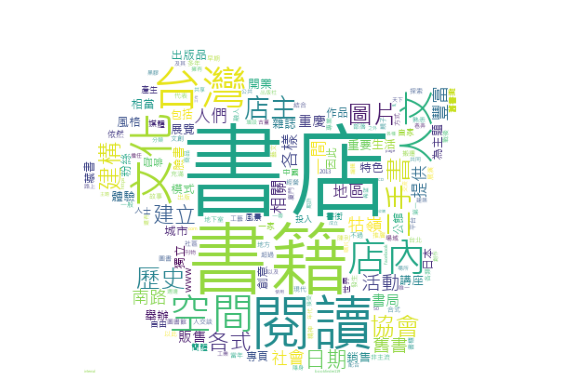

In [60]:
mask = np.array(Image.open("1382939234-3435780353.jpg"))#匯入圖片
font = "C:\Windows\Fonts\MSJH.TTC"#字體路徑
#文字雲呈現
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)
#調整大小
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

-----
## 來試試爬蟲抓取Google評論
* [google map微貳獨冊](https://www.google.com/maps/place/%E5%BE%AE%E8%B2%B3%E7%8D%A8%E5%86%8A/@25.0384613,121.5557041,17z/data=!3m1!5s0x3442abc8991706bb:0x2402cf6df9b024a9!4m7!3m6!1s0x3442abc89903d0e7:0xb2251297f34f74b0!8m2!3d25.0384613!4d121.5557041!9m1!1b1?hl=zh-TW)
* 利用文字探勘來整理資料
* 網路爬蟲參考網站：[Python 爬取Google map](https://medium.com/%E8%AA%A4%E9%97%96%E6%95%B8%E6%93%9A%E5%8F%A2%E6%9E%97%E7%9A%84%E5%95%86%E7%AE%A1%E4%BA%BAzino/python-%E7%88%AC%E5%8F%96google-map%E6%9C%80%E6%96%B0%E5%95%86%E5%AE%B6%E8%B3%87%E8%A8%8A%E8%A9%95%E8%AB%96-%E5%AF%A6%E4%BD%9C-%E5%8B%95%E6%85%8B%E7%B6%B2%E9%A0%81-%E7%88%AC%E8%9F%B2-527d66a7e747)

In [61]:
#引入函式庫
import requests 
import json

# 超連結
url = 'https://www.google.com/maps/preview/review/listentitiesreviews?authuser=0&hl=zh-TW&gl=tw&pb=!1m2!1y3765761116484128999!2y12836686756720899248!2m1!2i10!3e1!4m5!3b1!4b1!5b1!6b1!7b1!5m2!1s0SN1Y8G2H5Om1e8PnO2FyAs!7e81'
# 發送get請求
text = requests.get(url).text
# 取代掉特殊字元，這個字元是為了資訊安全而設定的喔。
pretext = ')]}\''
text = text.replace(pretext,'')
# 把字串讀取成json
soup = json.loads(text)

# 取出包含留言的List 。
conlist = soup[2]

# 逐筆抓出
for i in conlist:
    print("username:"+str(i[0][1]))
    print("time:"+str(i[1]))
    print("comment:"+str(i[3])) #第三項是我們要的評論

username:Emily Lee
time:1 週前
comment:非常悠閒的空間，
這裡可使用台北通藝文券。
裡面很多書都可以看。

老闆會詳細的介紹茶葉的特色，
並且讓客人試問茶葉。
茶飲的容器很特別，
茶還不錯喝。
不收服務費。

可以使用Line Pay、街口支付、台灣pay等支付方式，
發票還可以存手機載具。
username:Stanley Lin
time:1 個月前
comment:一家獨立書店，可以看書配上咖啡，座位不多但非常舒適，喜歡選書店的人請不要錯過！假日的人竟然不多，希望可以一直經營下去，老闆也非常讚會介紹咖啡豆喝起來的感覺與特色，除了選書還有選好茶和好豆子，對了，現煮的鍋煮奶茶也很好喝！
username:C
time:10 個月前
comment:氣氛很好的小書店，茶、咖啡價位較高一些，但用心製作、店內可讀書，喜歡這個空間。
username:梁子Liangz
time:1 年前
comment:很溫暖的獨立書店，還有咖啡茶可以悠閒享用。這裡的書可以翻閱再購買，喜歡閱讀的人一定會喜歡這邊~ (國父紀念館站步行約5分鐘)
username:Mel
time:1 年前
comment:店很棒，氣氛很好👍
距離捷運國父紀念館站二號出口步行6-7分鐘
距離附近停車場步行3分鐘
username:Alice CHEN
time:2 年前
comment:特色選書，環境沈穩舒適，漫步其中也不怕受打擾。
美好的讓人忘了時間，有一種充飽了電可以再重新出發的感覺。
喝了一款放鬆茶，真的很香很好喝，從看煮茶的過程、到送上的茶具，都是視覺上的享受。音樂也是，可以說五感被真正的療癒。
username:Steven Lin
time:4 年前
comment:超級棒的獨立書店，店裡也時常舉辦講座或新書發表會之類的，咖啡超棒的，在市區裡有這樣的一個空間真是奢侈的享受！
username:Cara Huang
time:3 年前
comment:店內非常溫馨可愛，也時常與不同作家、藝術家和設計師合作，每次造訪都有小驚喜，手工布丁非常好吃（不過不是每天都有 😂）大推現煮的鍋煮奶茶，濃郁好喝～
username:peiguei wu
time:2 年前
comment:選書有趣，貓咪、女性、哲學、身心靈、旅遊、養生、自然～離信義安和站、國父紀念館站走路19分鐘，

In [62]:
temp = []
# 逐筆抓出
for i in conlist:
    temp.append(i[3])
df = pd.DataFrame(temp)
df.columns = ['comment']
df

,comment
0,非常悠閒的空間，\n這裡可使用台北通藝文券。\n裡面很多書都可以看。\n\n老闆會詳細的介紹...
1,一家獨立書店，可以看書配上咖啡，座位不多但非常舒適，喜歡選書店的人請不要錯過！假日的人竟然不...
2,氣氛很好的小書店，茶、咖啡價位較高一些，但用心製作、店內可讀書，喜歡這個空間。
3,很溫暖的獨立書店，還有咖啡茶可以悠閒享用。這裡的書可以翻閱再購買，喜歡閱讀的人一定會喜歡這邊...
4,店很棒，氣氛很好👍\n距離捷運國父紀念館站二號出口步行6-7分鐘\n距離附近停車場步行3分鐘
5,特色選書，環境沈穩舒適，漫步其中也不怕受打擾。\n美好的讓人忘了時間，有一種充飽了電可以再重...
6,超級棒的獨立書店，店裡也時常舉辦講座或新書發表會之類的，咖啡超棒的，在市區裡有這樣的一個空間...
7,店內非常溫馨可愛，也時常與不同作家、藝術家和設計師合作，每次造訪都有小驚喜，手工布丁非常好吃...
8,選書有趣，貓咪、女性、哲學、身心靈、旅遊、養生、自然～離信義安和站、國父紀念館站走路19分鐘...
9,天龍國巷內有這樣的小書店真是不錯，選書品味也很好


In [63]:
df['yap'] = " "
df.head()

,comment,yap
0,非常悠閒的空間，\n這裡可使用台北通藝文券。\n裡面很多書都可以看。\n\n老闆會詳細的介紹...,
1,一家獨立書店，可以看書配上咖啡，座位不多但非常舒適，喜歡選書店的人請不要錯過！假日的人竟然不...,
2,氣氛很好的小書店，茶、咖啡價位較高一些，但用心製作、店內可讀書，喜歡這個空間。,
3,很溫暖的獨立書店，還有咖啡茶可以悠閒享用。這裡的書可以翻閱再購買，喜歡閱讀的人一定會喜歡這邊...,
4,店很棒，氣氛很好👍\n距離捷運國父紀念館站二號出口步行6-7分鐘\n距離附近停車場步行3分鐘,


In [64]:
jieba.load_userdict('./userdict.txt')
jieba.analyse.set_stop_words('stopnew.txt')
index = 0
for documents in df[0]:
    yap_list = jieba.analyse.extract_tags(documents, 150)
    #yap_list = jieba.lcut(documents)
    df['yap'].iloc[index] = yap_list
    index += 1
    
jieba.analyse.set_stop_words('stopwords.txt') #自己建一個贅字檔
index = 0
for documents in orgdata['intro']: #將檔案的intro欄位利用迴圈存入documents
    seg_list = jieba.analyse.extract_tags(documents, 150) #150是前150個權重最高的單詞
    #seg_list = jieba.lcut(documents) #不刪除贅字
    orgdata['seg'].iloc[index] = seg_list #存入seg_list
    index += 1


KeyError: 0

In [65]:
df['yap']

0     
1     
2     
3     
4     
5     
6     
7     
8     
9     
Name: yap, dtype: object

In [66]:
yap_list

NameError: name 'yap_list' is not defined

In [372]:
type(df['yap'])

pandas.core.series.Series

In [373]:
yap_list = df['yap'].tolist()
type(yap_list)

list

In [376]:
flat = [x for sublist in yap_list for x in sublist]
diction = Counter(flat)

In [390]:
diction.keys()

dict_keys(['茶葉', '支付', '悠閒', '空間', '台北通藝文券', '裡面', '老闆', '詳細', '介紹', '並且', '試問', '茶飲', '很特別', '還不錯', '服務費', 'Line', 'Pay', '台灣', 'pay', '發票還', '手機載具', '街口', '使用', '容器', '客人', '特色', '非常', '很多', '方式', '獨立', '看書', '舒適', '喜歡', '錯過', '經營', '感覺', '選書', '還有', '選好', '現煮', '鍋煮', '咖啡豆', '喝起', '好喝', '奶茶', '豆子', '假日', '座位', '咖啡', '不多', '竟然', '一家', '下去', '希望', '除了', '不要', '一直', '氣氛', '價位', '店內', '讀書', '這個', '用心', '一些', '溫暖', '咖啡茶', '翻閱', '購買', '閱讀', '這邊', '國父紀念館站', '分鐘', '享用', '步行', '一定', '距離', '捷運', '二號', '停車場', '很棒', '出口', '附近', '環境', '沈穩', '打擾', '時間', '一種', '充飽', '了電', '出發', '過程', '視覺', '音樂', '的療', '五感', '很香', '煮茶', '漫步', '茶具', '一款', '美好', '不怕', '享受', '真的', '真正', '重新', '其中', '超級', '店裡', '時常', '舉辦', '講座', '新書', '發表會', '之類', '超棒', '市區裡', '這樣', '奢侈', '真是', '溫馨', '藝術家', '設計師', '造訪', '驚喜', '布丁', '不過', '推現', '濃郁', '好吃', '手工', '作家', '每次', '每天', '合作', '不同', '不是', '貓咪', '哲學', '身心靈', '旅遊', '養生', '離信義安', '19', '地點', '不錯', '巷內', '安靜', '店員', '推薦', '二手書', '友善', '有趣', '走路', '女性', '自然', '十分', '天龍國巷', '品味'])

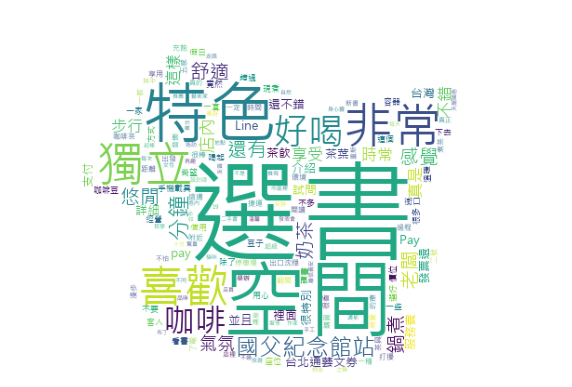

In [377]:
mask = np.array(Image.open("1382939234-3435780353.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()